## Gaming Analysis

We have a dataset with information on user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales. The aim is to identify patterns that determine whether a game succeeds or now. This allows one to identifiy potential successful games and plan advertising campaigns.

### Step 1

In [47]:
# Import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline 

In [5]:
df = pd.read_csv('games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

### Step 2

In [7]:
df.columns = df.columns.str.lower() # changing column names to lowercase

In [8]:
df.sort_values('year_of_release', inplace = True) # Sorting on Year
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,NaN


In [9]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

### The data types of following columns have been changed:

* __`year_of_release`__: This column represents the year in which a specific game of a platform is released. As it is not full `date` so we would avoid converting it to a `datetime` datatype. The default datatype of this column has been set to `float` which is not favourable for the processing that we need to perform. So the datatype of this column is converted to `int`.

$$$$

* __`user_score`__: This column represents the score given to the game according to the user's perspective. The default datatype for this column has been set to `object` as it contains **tbd** in it. We would need to convert this column to `float` if we want to perform any processing on it. Before converting it to `float`, we would need to remove all the rows which contain the word __tbd__ in this column. As the removing rows with `tbd` also means losing important dat of other columns, so we will not perform this operation until we need process this column.

In [10]:
df[df['year_of_release'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### The following 4 columns have missing values:

* __`year_of_release`__: As we can see in the above output that there are `269` rows whose `year_of_release` data is not available. We don;t have enough information to just assume that the missing data belongs to `2016`, so the optimum way to deal with this would be to remove all the rows where the value for `year_of_release` column is missing.
$$$$
* __`critic_score`__: This is a complicated case as we cannot simply assume values for it because it will effect the results that are based on this column. Removing the rows with missing values in `critic_score` column would also not be feasible as important data in other columns might get lost. The optimum decision would be to leave it as it is as the availability of missing values will not affect our results based on this column.
$$$$
* __`user_score`__(Column with __tbd__ value): This is a complicated case as we cannot simply assume values for it because it will effect the results that are based on this column. Removing the rows with missing values in `user_score` column would also not be feasible as important data in other columns might get lost. The optimum decision would be to leave it as it is as the availability of missing values will not affect our results based on this column. We would however remove the rows where the value of this column is __tbd__. This value means that we are still waiting for a rating on this from a users perspective and as a users perspective is not involved in this row of data, we can manage to remove this. However, we would only perform this operation when specific functions need to be performed on this column, otherwise we would use the complete data.
$$$$
* __`rating`__: This is a complicated case as we cannot simply assume values for it because it will effect the results that are based on this column. Removing the rows with missing values in `rating` column would also not be feasible as important data in other columns might get lost. The optimum decision would be to leave it as it is as the availability of missing values will not affect our results based on this column.

In [11]:
df = df[df['year_of_release'].notnull()].copy() # Removing rows where value of year_of_release column is NaN

df.year_of_release = df.year_of_release.astype('int64') # Converting datatype of year_of_release column to int

df['Total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # Computing the Total_sales column
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Total_sales
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.00,0.01,NaN,NaN,NaN,1.15
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.00,0.03,NaN,NaN,NaN,2.76
1968,Defender,2600,1980,Misc,0.99,0.05,0.00,0.01,NaN,NaN,NaN,1.05
6300,Bridge,2600,1980,Misc,0.25,0.02,0.00,0.00,NaN,NaN,NaN,0.27
6875,Checkers,2600,1980,Misc,0.22,0.01,0.00,0.00,NaN,NaN,NaN,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...
15198,Psycho-Pass: Mandatory Happiness,PSV,2016,Adventure,0.00,0.01,0.01,0.00,64.0,7.3,T,0.02
15210,Atelier Firis: The Alchemist of the Mysterious...,PSV,2016,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
10371,WWE 2K17,X360,2016,Sports,0.05,0.04,0.00,0.01,NaN,tbd,T,0.10
12352,Utawarerumono: Futari no Hakuoro,PSV,2016,Misc,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06


In [14]:
df[df['year_of_release'] != 2016.0][['name', 'platform', 'year_of_release', 'Total_sales']].to_csv('test.csv', index=False)

### Step 3

### Number of games released every year

In [29]:
game_count_byYear = df.groupby('year_of_release').count()['platform']
game_count_byYear.reset_index()

,year_of_release,platform
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


###### Graphical representation

Text(0, 0.5, 'Games Released')

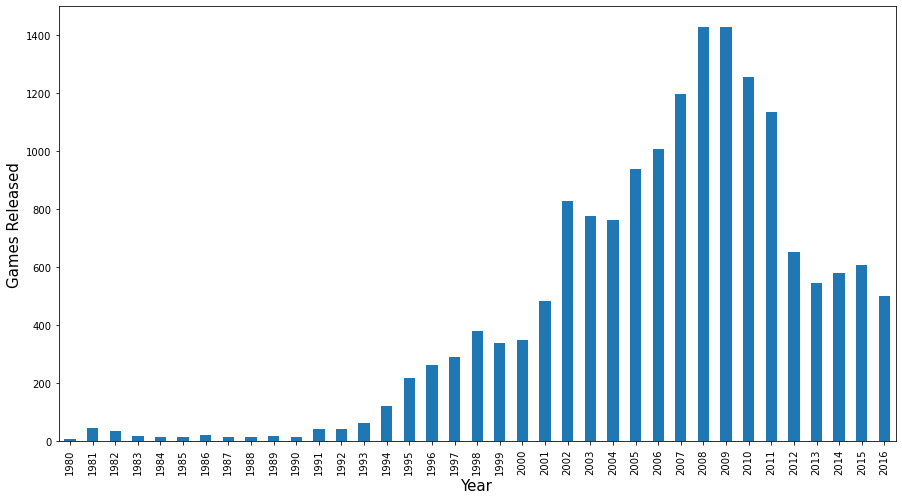

In [30]:
game_count_byYear.plot.bar(figsize = (15, 8))
plt.xlabel('Year', size=15)
plt.ylabel('Games Released', size=15)

### Analysis

#### According to the above graph, it looks like the rise of games and gaming patforms started in the late 90's era. It can be seen that in the 80's not many games were released but the tide really changed in the 90's and in the 21'st century. The data for every period mentioned in the graph would not be significant in predicting a marketing campaign for 2017.


## Look how sales vary from platform to platform.

### Platform with greatest total sales

##### We will be choosing those platforms whose Total sales value will exceed the value of `100.0`. This will be our assumed benchmark for greatest total sales as no specific number is mentioned.

In [31]:
df_test = df.groupby('platform')['Total_sales'].sum().reset_index().sort_values('Total_sales', ascending=False).copy()
df_platform = df_test[df_test['Total_sales'] > 100.0]
df_platform

,platform,Total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [32]:
df_test = df.groupby('platform')['Total_sales'].sum().sort_values(ascending=False).copy()
df_platform = df_test[df_test > 100.0]
df_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
Name: Total_sales, dtype: float64

#### Graphical representation of the data distribution based on each year

In [35]:
# Constructing a KDE plot which is just a smoothed out version of the histogram which is also visible.
plt.figure(figsize=(10,8))
sns.distplot(df_platform['Total_sales'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

KeyError: 'Total_sales'

<Figure size 720x576 with 0 Axes>

In [34]:
# Constructing a normal distribution plot

vals = df_platform['Total_sales']
v_mean = np.mean(vals)
v_std = np.std(vals)
pdf = stats.norm.pdf(vals, v_mean, v_std)
plt.figure(figsize=(10,8))
plt.plot(vals, pdf)

KeyError: 'Total_sales'

##### According to the above two plots, it is evidently clear that sales data for the platforms with greatest total sales is not normally distributed. The data is positively skewed which means that data conatains large data points and mean value is greater than the median. This can be considered a good point as positively skewed sales represent good behaviour.



### Plaforms which were popular but now have zero sales (Now = 2016) (Popular = Sales > 0.5)

##### For this, we will assume that any platform is popular if its total sales are greater than `0.5`. The `now` time period will be considered `2016`.

In [36]:
df2 = df.copy()
df_2016 = df2[df2['year_of_release'] == 2016]['platform'].unique()
df2 = df2[(df2['Total_sales'] >= 0.5) & (df2['platform'].isin(df_2016) == False)]
print("The following are the platforms which were once famous and now have zero sales:\n\n", df2['platform'].unique())

The following are the platforms which were once famous and now have zero sales:

 ['2600' 'NES' 'GB' 'SNES' 'GEN' 'SCD' 'PS' 'SAT' 'N64' 'DC' 'PS2' 'XB'
 'WS' 'GC' 'GBA' 'DS' 'PSP']


### Determining data from which period should be chosen

In [37]:
df_filter = df[df['year_of_release'] == 2016]['platform'].unique()
df_filter = np.delete(df_filter, 3) # Removing PC platform
relevant_years = df[df['platform'].isin(df_filter)]['year_of_release'].unique()
print("The following relevant periods are chosen:\n\n", relevant_years)
print("\n\nThe following relevant platforms in the above time periods are chosen:\n\n", df_filter)

The following relevant periods are chosen:

 [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


The following relevant platforms in the above time periods are chosen:

 ['WiiU' 'PS3' 'PS4' 'PSV' 'XOne' '3DS' 'X360' 'Wii']


##### The platform `PC` was also selected during our processing but was ignored as it was an extreme outlier. If `PC` was included then all the other time periods would also get selected which would not present any relevant data for the rest of the selected platforms and it will become redundant. That's why `PC` paltform was ignored from our finalized dataset.

### Selecting relevant data

In [38]:
df_final = df[(df['year_of_release'].isin(relevant_years)) & (df['platform'].isin(df_filter))]
df_final

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Total_sales
5969,NBA Live 06,X360,2005,Sports,0.27,0.00,0.00,0.02,64.0,5.6,E,0.29
6558,Peter Jackson's King Kong: The Official Game o...,X360,2005,Action,0.20,0.03,0.00,0.02,80.0,7.5,T,0.25
3374,PGR3 - Project Gotham Racing 3,X360,2005,Racing,0.49,0.03,0.03,0.05,NaN,NaN,NaN,0.60
5779,Tiger Woods PGA Tour 06,X360,2005,Sports,0.28,0.00,0.00,0.02,71.0,7.4,E,0.30
8663,Amped 3,X360,2005,Sports,0.13,0.02,0.00,0.01,72.0,7.1,T,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...
15198,Psycho-Pass: Mandatory Happiness,PSV,2016,Adventure,0.00,0.01,0.01,0.00,64.0,7.3,T,0.02
15210,Atelier Firis: The Alchemist of the Mysterious...,PSV,2016,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
10371,WWE 2K17,X360,2016,Sports,0.05,0.04,0.00,0.01,NaN,tbd,T,0.10
12352,Utawarerumono: Futari no Hakuoro,PSV,2016,Misc,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06


### Which platforms are leading in sales?

In [39]:
df_final.groupby(['platform'])['Total_sales'].sum().reset_index().sort_values('Total_sales', ascending=False)

,platform,Total_sales
6,X360,961.24
1,PS3,931.34
4,Wii,891.18
2,PS4,314.14
0,3DS,257.81
7,XOne,159.32
5,WiiU,82.19
3,PSV,53.81


##### The above table shows which of our chosen platforms in our chosen time periods have the higest and lowest total sales.

### Which platforms are growing or shrinking?

Text(0, 0.5, 'Total_sales')

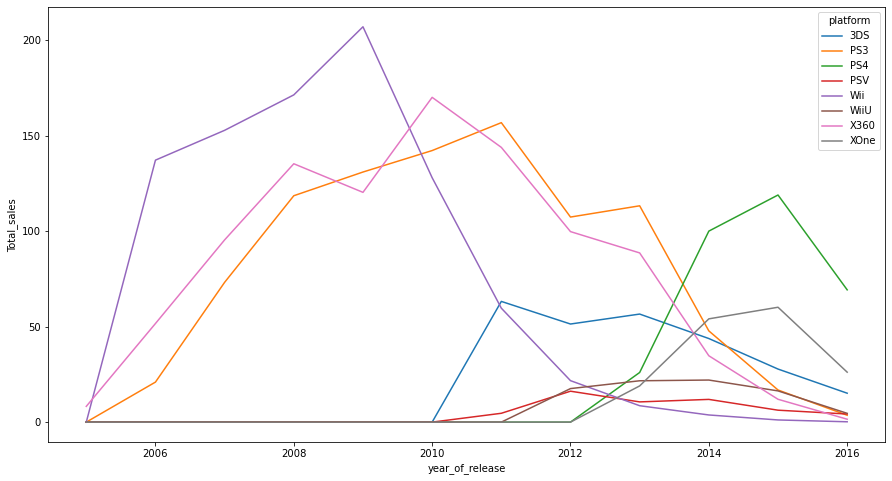

In [46]:
df_final.groupby(['year_of_release', 'platform'])['Total_sales'].sum().unstack().fillna(0).plot(figsize = (15, 8))
plt.ylabel('Total_sales')
# PS4, XOne, 3DS

##### The above line graph clearly shows which of the choosen platforms in our choosen time periods are growing and shrinking in sales. According to the above graph, the platforms that are currently in the growth phase are`PS4`, `XOne`, `3DS` and are growing in sales. The rest of the rremaining platforms are shrinking in sales according to the above graph.

### Box plot for the global sales of all games.

C:\Users\alaiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alaiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alaiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alaiy\anaconda3\lib\si

Mean Value of X360 is 0.7808610885458966
Mean Value of PS3 is 0.7136704980842895
Mean Value of Wii is 0.6929860031104199
Mean Value of 3DS is 0.5035351562499999
Mean Value of PSV is 0.1254312354312356
Mean Value of WiiU is 0.5591156462585036


C:\Users\alaiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alaiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alaiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Mean Value of XOne is 0.6450202429149801
Mean Value of PS4 is 0.8013775510204074


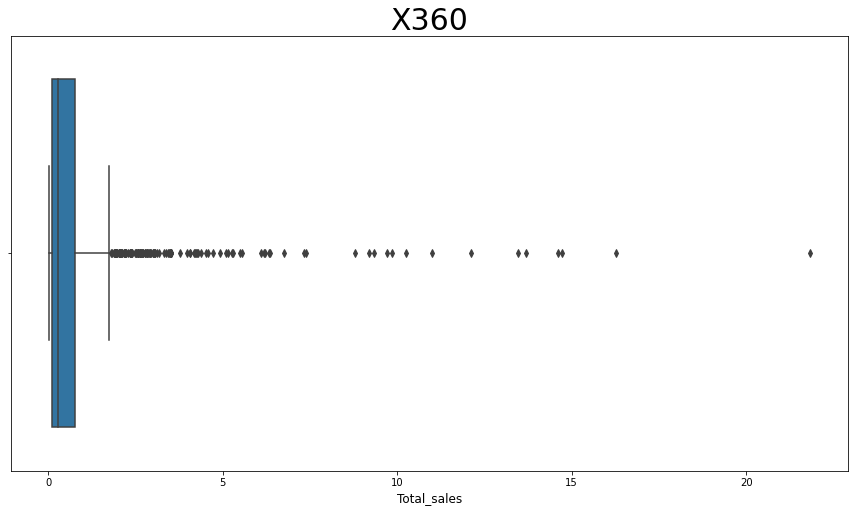

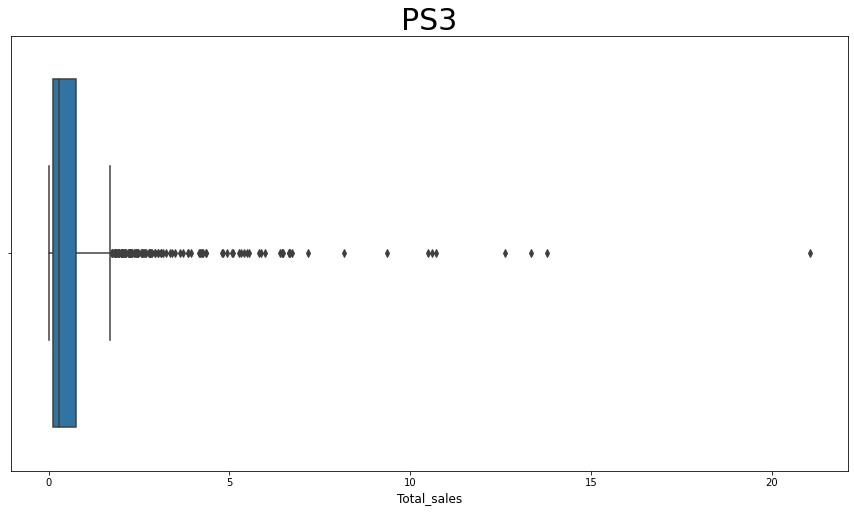

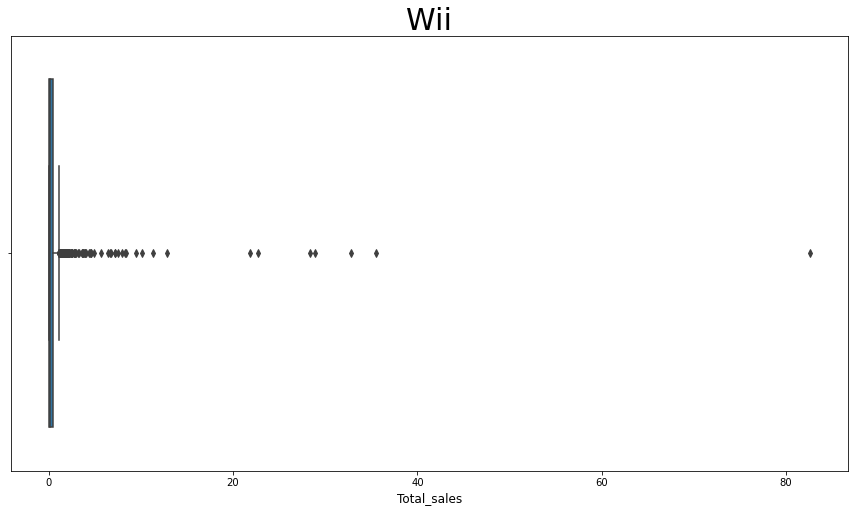

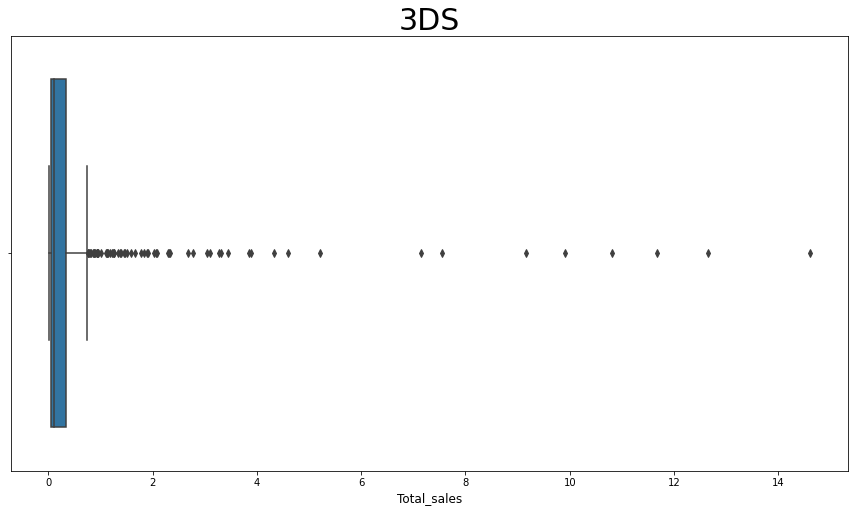

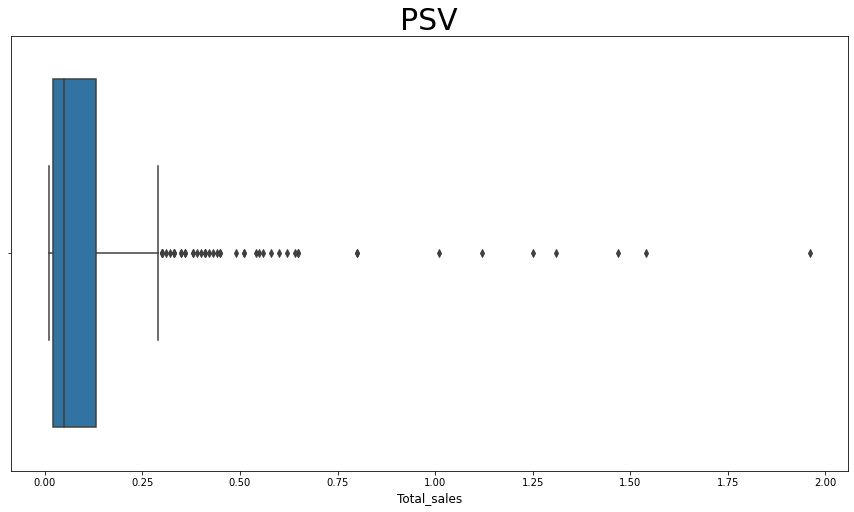

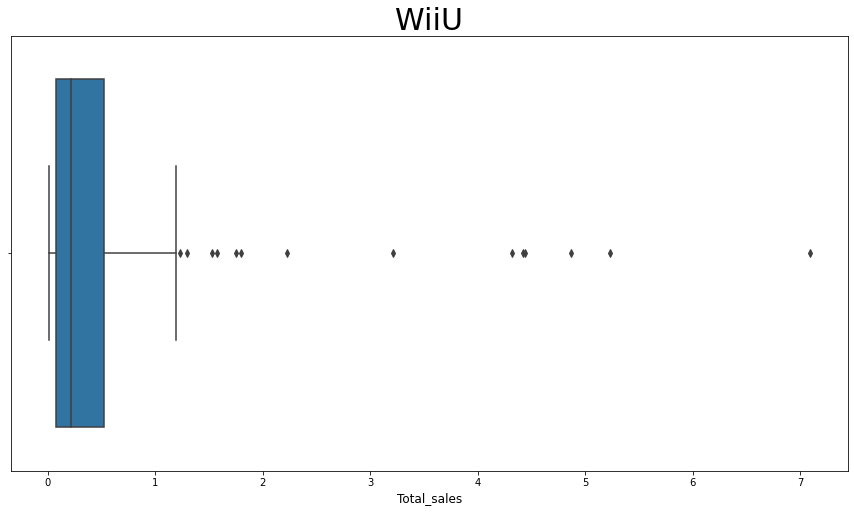

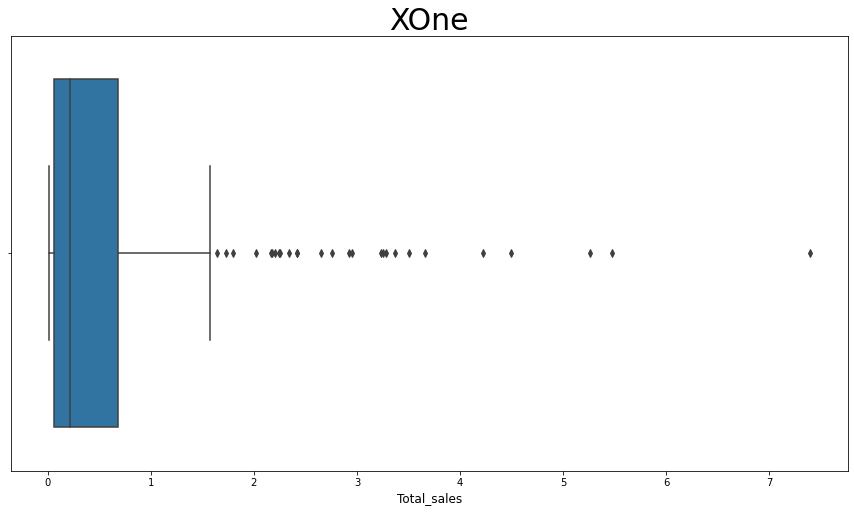

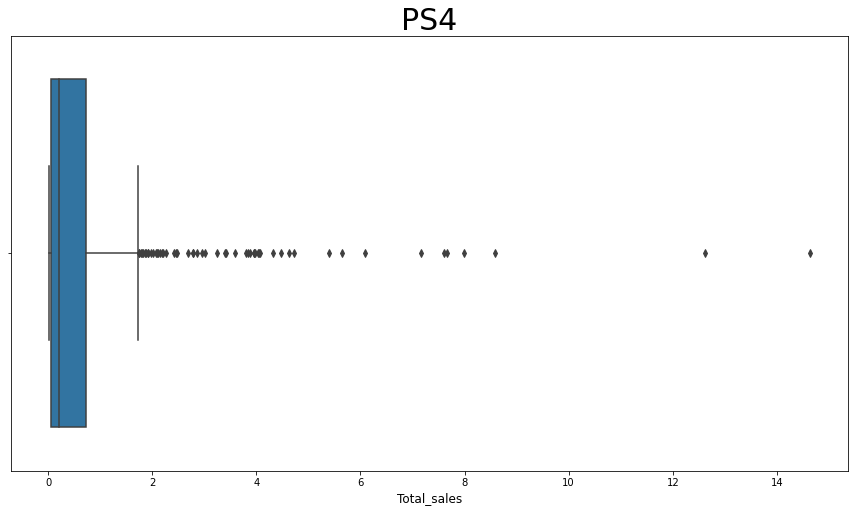

In [65]:
res = df_final.groupby(['platform', 'name'])['Total_sales'].sum()
for name in df_final['platform'].unique():
    plt.figure(figsize=(15,8))
    plt.xlabel('Total Sales', size=12)
    plt.title(name, size = 30)
    sns.boxplot(res[name])
    print("Mean Value of", name, "is", res[name].mean())

##### The difference is sales is quite visible and significant in the above graphs. Every platform has a lot of positive outliers but it can also be seen that most of the outliers are clustered close to the maximum value. The average sales values for most of the platforms are pretty close except for the `PSV` platform. These similarities indicate that we were right in selecting these platforms and time periods to compute results for 2017 as they are all closely connected in terms of their statistical features.

### Choosing PS4 as a platform to draw a scatter plot

C:\Users\alaiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'JointGrid' object has no attribute 'annotate'

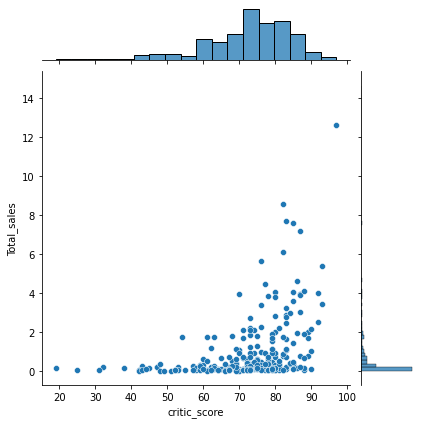

In [42]:
# Scatter plot for column critic_score with column Total_sales

res2_c = df_final[df_final['platform'] == 'PS4'][['name', 'critic_score', 'Total_sales']]
sns.jointplot('critic_score', 'Total_sales', res2_c, kind = 'scatter').annotate(stats.pearsonr)

##### The above is a scatter plot between `critic_score` and `Total_sales` and on the top is the correlation score is displayed. The correlation score for them is `0.41` which means that the two columns are positively correlated. It means a good or higher `critic_score` will fetch higher sales for the `PS4` platform.

C:\Users\alaiy\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\alaiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'JointGrid' object has no attribute 'annotate'

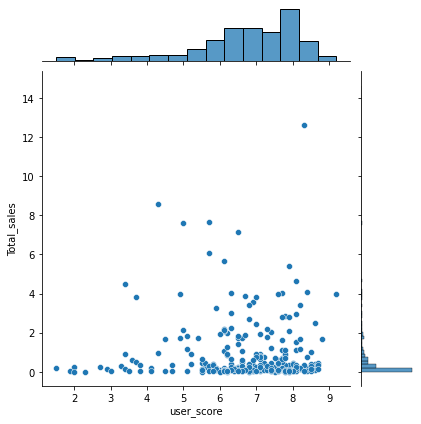

In [63]:
# Scatter plot for column user_score with column Total_sales

df_final2 = df_final[df_final['user_score'] != 'tbd']
df_final2.user_score = df_final2.user_score.astype('float64')
res2_u = df_final2[df_final2['platform'] == 'PS4'][['name', 'user_score', 'Total_sales']]
sns.jointplot('user_score', 'Total_sales', res2_u, kind = 'scatter').annotate(stats.pearsonr)

##### The above is a scatter plot between `user_score` and `Total_sales` and on the top is the correlation score is displayed. The correlation score for them is `-0.032` which means that the two columns display a very loose negative correlation. As the correlation score is very close to `0`, so the two columns wont display any correlated behaviour(not negative or positive). This suggests that no matter what the value of `user_score` is, it will not affect the sales of `PS4` platform according to the provided data. 

### General distribution of games by genre

Text(0, 0.5, 'Game_count')

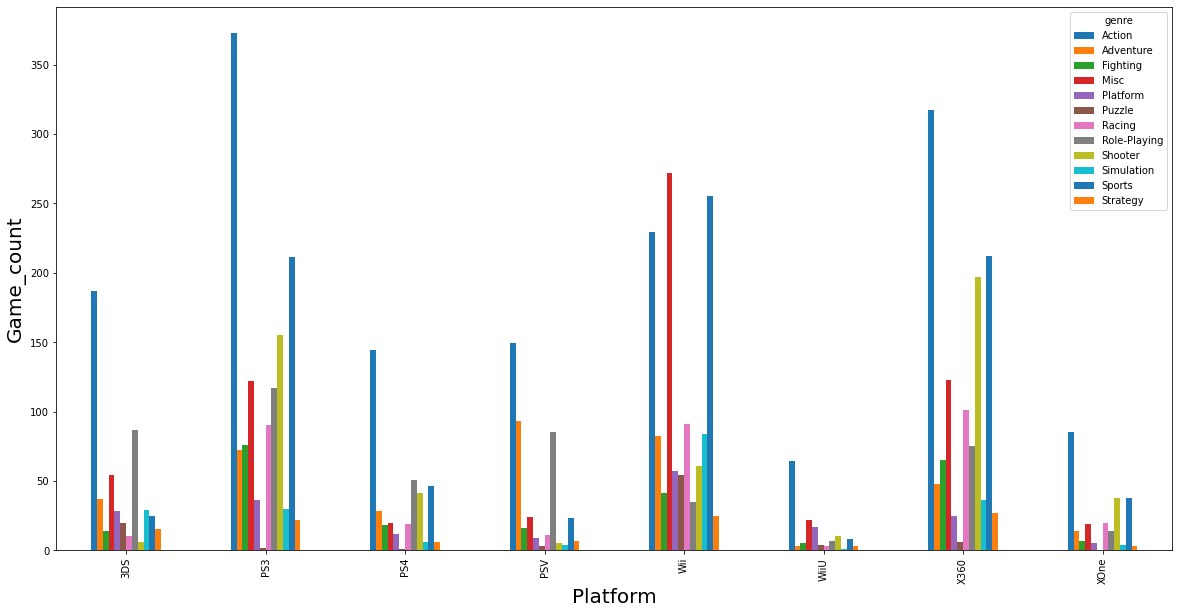

In [72]:
df_final.groupby(['platform', 'genre'])['name'].count().unstack().fillna(0).plot.bar(figsize = (20, 10))
plt.xlabel('Platform', size=20)
plt.ylabel('Game_count', size=20)

##### The above graph clearly displays which platform released how much game of which genre over the course of our chosen time periods.


### Most profitable games with high and low sales

Text(0, 0.5, 'Total_sales')

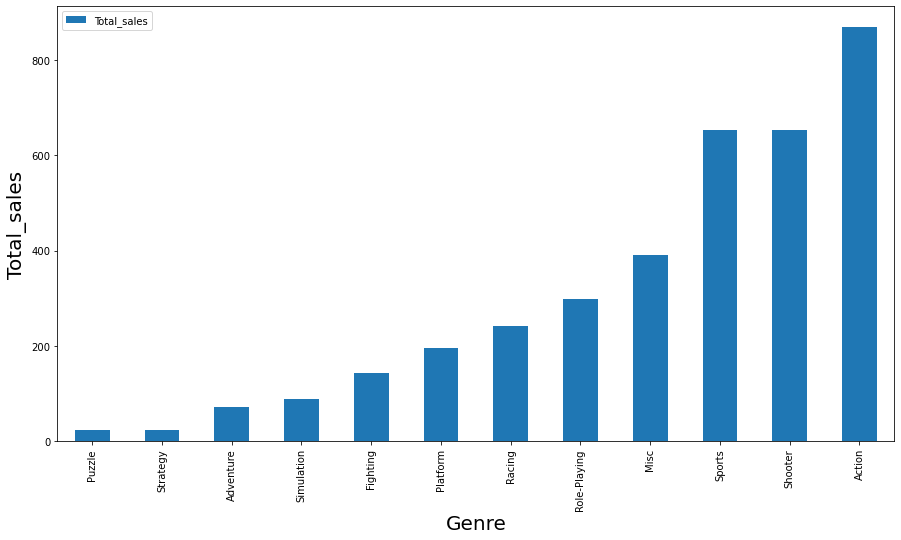

In [67]:
df_final.groupby(['genre'])['Total_sales'].sum().reset_index().sort_values('Total_sales').plot.bar(x='genre', y='Total_sales', figsize=(15,8))
plt.xlabel('Genre', size=20)
plt.ylabel('Total_sales', size=20)


##### According to the above graph, the most profitable genres are related to competetive type gaming genres such as `Action`, `Shooter`, and `Sports`. We can generalize a conclusion based on our statement that games where users have to play against some other user or users are considered most profitable ones and the rest of the games can be considered less profitble according to the provided data. It can also be noted that games which are available on widely used devices also fetch higher sales than the games which require specific platforms for the games to work.




### Step 4

### Top five platforms for each region based on their sales

### Graphical representation of the top 5 platforms based on sales in the `na` region.

Text(0, 0.5, 'Sales')

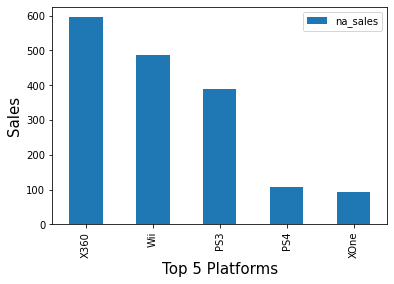

In [68]:
df_final.groupby(['platform'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head().set_index('platform').plot.bar()
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

### Graphical representation of the top 5 platforms based on sales in the `eu` region.

Text(0, 0.5, 'Sales')

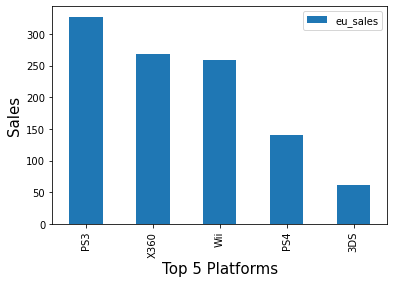

In [69]:
df_final.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head().set_index('platform').plot.bar()
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

### Graphical representation of the top 5 platforms based on sales in the `jp` region.

Text(0, 0.5, 'Sales')

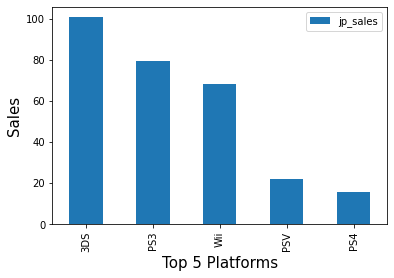

In [70]:
df_final.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head().set_index('platform').plot.bar()
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

## Total market share

In [50]:
tms = df_final['Total_sales'].sum()
print("Total Market share for the selected time periods and platforms is", tms)

Total Market share for the selected time periods and platforms is 3651.0299999999997


### Market share occupied by the `na` region

In [51]:
na_ms = df_final['na_sales'].sum()
na_ms / tms *100

49.515342245886785

### Market share occupied by the `eu` region

In [52]:
eu_ms = df_final['eu_sales'].sum()
eu_ms / tms *100

31.388402724710563

### Market share occupied by the `jp` region

In [53]:
jp_ms = df_final['jp_sales'].sum()
jp_ms / tms *100

8.538960238617596

##### According to the above results, it is concluded that out of the `100%` market share of `3651`, the `na` region occupies `49.5%`, the `eu` region occupies `31.4%`, and the `jp` region occupies `8.5%`. The remaining market share is occupied by the `other_sales` column in the original dataset.


## Top five genres for each region based on their sales

### Graphical representation of the top 5 genres based on sales in the `na` region.

Text(0, 0.5, 'Sales')

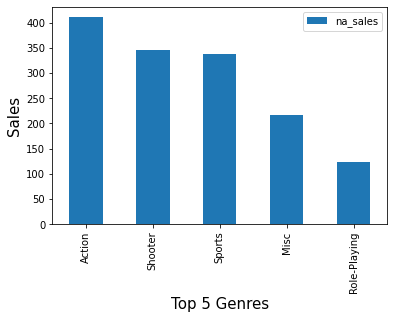

In [54]:
df_final.groupby(['genre'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head().set_index('genre').plot.bar()
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15)

### Graphical representation of the top 5 genres based on sales in the `eu` region.

Text(0, 0.5, 'Sales')

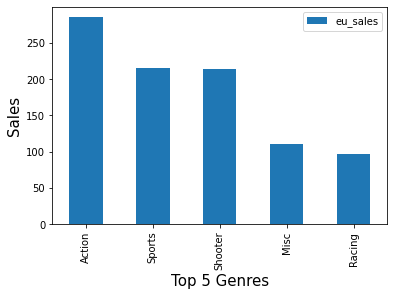

In [55]:
df_final.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head().set_index('genre').plot.bar()
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15)

### Graphical representation of the top 5 genres based on sales in the `jp` region.

Text(0, 0.5, 'Sales')

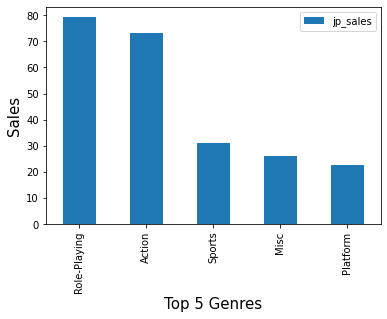

In [56]:
df_final.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head().set_index('genre').plot.bar()
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15)

## Do ESRB rating affect sales?

### ESRB rating for `na` region

Total na_sales without ESRB rating in na region is 178.51999999999998


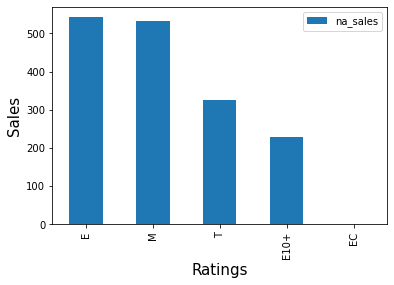

In [57]:
df_final.groupby(['rating'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).set_index('rating').plot.bar()
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15)

print("Total na_sales without ESRB rating in na region is", df_final[df_final['rating'].isna()]['na_sales'].sum())

##### For `na` region, the sales with ESRB rating are quite higher than the sales without any rating. So we can assume that in the `na` region, the ESRB rating does affect sales.


### ESRB rating for `eu` region

Total eu_sales without ESRB rating in eu region is 154.29000000000002


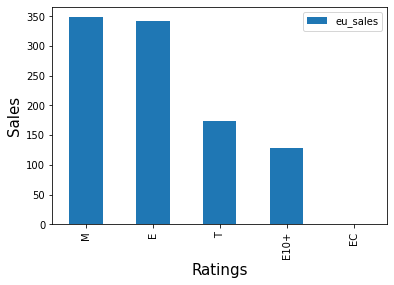

In [58]:
df_final.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).set_index('rating').plot.bar()
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15)

print("Total eu_sales without ESRB rating in eu region is", df_final[df_final['rating'].isna()]['eu_sales'].sum())

##### For `eu` region, the sales with ESRB rating are quite higher than the sales without any rating. So we can assume that in the `eu` region, the ESRB rating does affect sales.


### ESRB rating for `jp` region

Total jp_sales without ESRB rating in jp region is 126.12


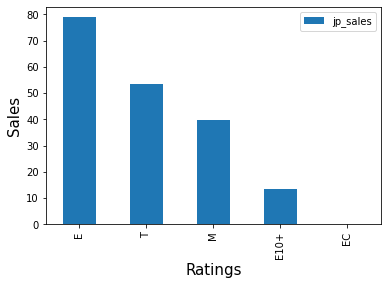

In [59]:
df_final.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).set_index('rating').plot.bar()
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15)

print("Total jp_sales without ESRB rating in jp region is", df_final[df_final['rating'].isna()]['jp_sales'].sum())

##### For `jp` region, the sales with ESRB rating are quite lower than the sales without any rating. So we can assume that in the `jp` region, the ESRB rating does not affect sales.